<a href="https://colab.research.google.com/github/sajeebju/FunCode/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [6]:
 (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

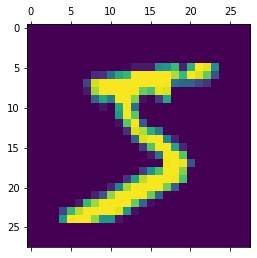

In [8]:
plt.matshow(X_train[0])

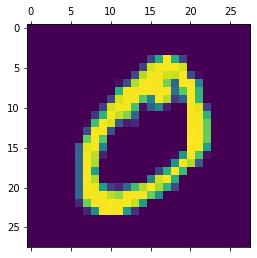

In [9]:
plt.matshow(X_train[1])

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


Model Building

In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape = (784, ), activation = 'softmax')        
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
              
              )
model.fit(X_train_flattened , y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 1ms/step - loss: 0.7127 - accuracy: 0.8143
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3144 - accuracy: 0.9126
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2863 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2712 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2710 - accuracy: 0.9238


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2752 - accuracy: 0.9229


[0.27515631914138794, 0.9229000210762024]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted

array([[2.9670132e-06, 4.1310070e-11, 5.1206412e-06, ..., 9.9777192e-01,
        1.5378129e-05, 2.9235726e-04],
       [5.5395707e-04, 4.0537757e-06, 9.8973364e-01, ..., 8.1054107e-16,
        1.8361534e-04, 1.3113662e-12],
       [2.3436576e-06, 9.8210597e-01, 8.7185726e-03, ..., 9.6168218e-04,
        3.9669992e-03, 2.8149545e-04],
       ...,
       [6.6458774e-08, 5.6873503e-08, 1.0729407e-05, ..., 6.4435690e-03,
        2.0412175e-02, 5.2238304e-02],
       [3.8110193e-07, 4.2240336e-07, 3.1369581e-07, ..., 1.5771271e-07,
        5.4752221e-03, 2.5226441e-07],
       [2.5149070e-06, 8.7979320e-14, 6.3775740e-05, ..., 3.3959736e-12,
        7.8333990e-08, 3.0381944e-10]], dtype=float32)

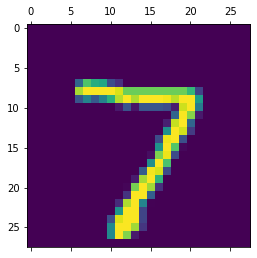

In [15]:
plt.matshow(X_test[0])

In [17]:
y_predicted[0]

array([2.9670132e-06, 4.1310070e-11, 5.1206412e-06, 1.8920475e-03,
       1.7446105e-07, 1.9988729e-05, 1.8232976e-10, 9.9777192e-01,
       1.5378129e-05, 2.9235726e-04], dtype=float32)

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    0,    5,    4,    3,    2,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   7,   11,  915,   12,    7,    6,   12,   10,   48,    4],
       [   5,    0,   18,  870,    0,   62,    2,   15,   30,    8],
       [   1,    1,    4,    1,  901,    0,   11,    7,   10,   46],
       [   7,    2,    2,   13,    6,  808,   10,    6,   31,    7],
       [  11,    3,    5,    1,    7,   23,  904,    2,    2,    0],
       [   1,    6,   22,    3,    2,    0,    0,  964,    2,   28],
       [   6,    7,    5,   13,    9,   35,    8,   11,  872,    8],
       [  10,    7,    1,    5,   15,   10,    0,   30,   10,  921]],
      dtype=int32)>

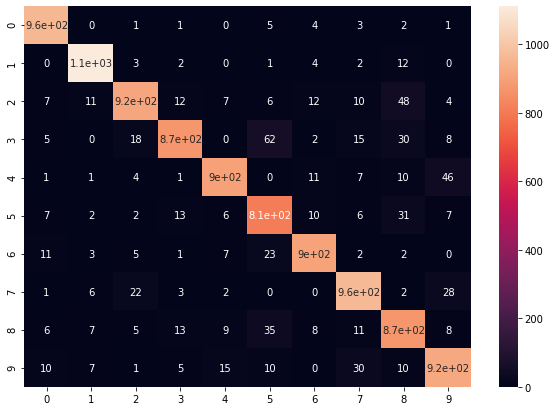

In [22]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.show()